# EE16A Homework 12

## Question 1: Mechanical Correlation

### Part (e)

In [2]:
import numpy as np
s1 = [2, -2, 2, -2]
s2 = [1, 2, 3, 4]
corr_s1_s2 = np.correlate(s1,s2,mode='full')
print('Linear correlation of s1 and s2:',corr_s1_s2)
corr_s2_s1 = np.correlate(s2,s1,mode='full')
print('Linear correlation of s2 and s1:',corr_s2_s1)

Linear correlation of s1 and s2: [ 8 -2  6 -4 -4 -2 -2]
Linear correlation of s2 and s1: [-2 -2 -4 -4  6 -2  8]


## Question 2: GPS Receivers

In [3]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import sys

Populating the interactive namespace from numpy and matplotlib


In [4]:
## RUN THIS FUNCTION BEFORE YOU START THIS PROBLEM
## This function will generate the gold code associated with the satellite ID using linear shift registers
## The satellite_ID can be any integer between 1 and 24
def Gold_code_satellite(satellite_ID):
    codelength = 1023
    registerlength = 10
    
    # Defining the MLS for G1 generator
    register1 = -1*np.ones(registerlength)
    MLS1 = np.zeros(codelength)
    for i in range(codelength):
        MLS1[i] = register1[9]
        modulo = register1[2]*register1[9]
        register1 = np.roll(register1,1)
        register1[0] = modulo
    
    # Defining the MLS for G2 generator
    register2 = -1*np.ones(registerlength)
    MLS2 = np.zeros(codelength)
    for j in range(codelength):
        MLS2[j] = register2[9]
        modulo = register2[1]*register2[2]*register2[5]*register2[7]*register2[8]*register2[9]
        register2 = np.roll(register2,1)
        register2[0] = modulo
    
    delay = np.array([5,6,7,8,17,18,139,140,141,251,252,254,255,256,257,258,469,470,471,472,473,474,509,512,513,514,515,516,859,860,861,862])
    G1_out = MLS1;
    shamt = delay[satellite_ID - 1]
    G2_out = np.roll(MLS2,shamt)
    
    CA_code = G1_out * G2_out
    
    return CA_code

### Part (a)

<Container object of 3 artists>

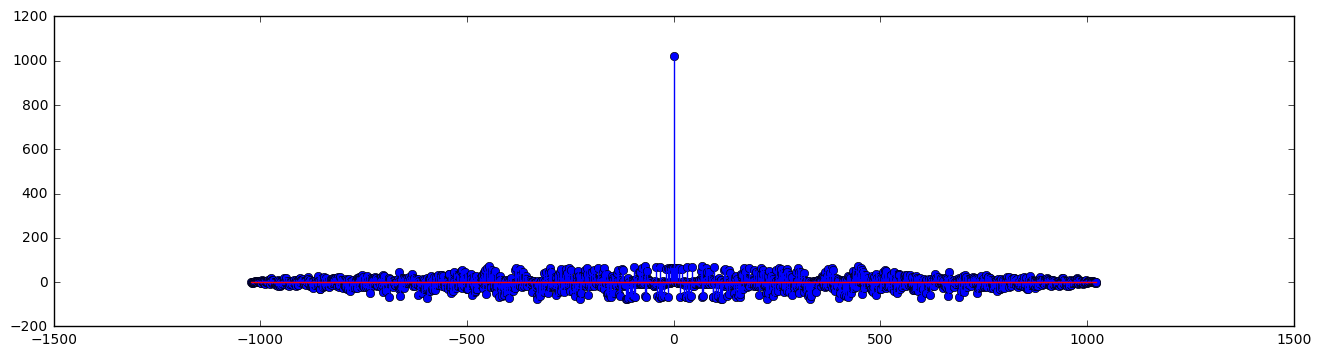

In [5]:
def array_correlation(array1, array2):
    """ This function should return two arrays or a matrix with one row corresponding to 
    the offset and other to the correlation value. array1 and array2 do not have to be
    arrays of equal length.
    """
    ## YOUR CODE HERE
    ## Use np.correlate with "FULL". Check out the documentation page.
    correlated_array = np.correlate(array1, array2, 'full')
    end_index = len(array1)
    st_index = -len(array2) + 1
    indices = np.arange(st_index, end_index)    
    return (indices, correlated_array)

# Plot the auto-correlation of satellite 10 with itself. Your signal should be centered
# at offset = 0.
# Use plt.plot or plt.stem to plot.

# YOUR CODE HERE
array_10 = Gold_code_satellite(10)
(ind_10, self_10) = array_correlation(array_10, array_10)
plt.figure(figsize=(16, 4))
plt.stem(ind_10, self_10)

The autocorrelation peaks at 1023 when the signals are perfectly aligned (offset 0). The correlation of a Gold code with a shifted version of itself is not significant.

### Part (b)

<Container object of 3 artists>

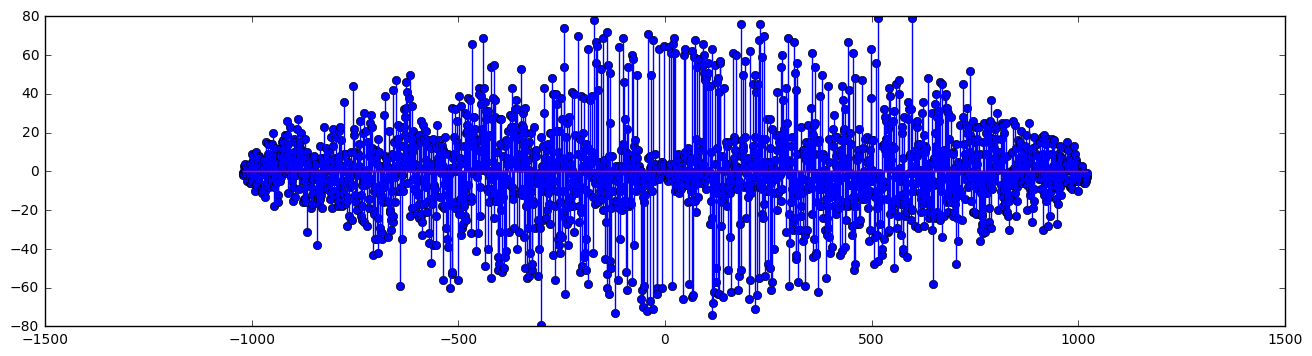

In [6]:
array_13 = Gold_code_satellite(13)
(ind_10_13, cross_10_13) = array_correlation(array_10, array_13)
plt.figure(figsize=(16, 4))
plt.stem(ind_10_13, cross_10_13)

We see that the cross-correlation of a Gold code of any satellite with any other satellite is very low.  This indicates that when given some unknown data, we can differentiate between different satellites.

### Part (c)

<Container object of 3 artists>

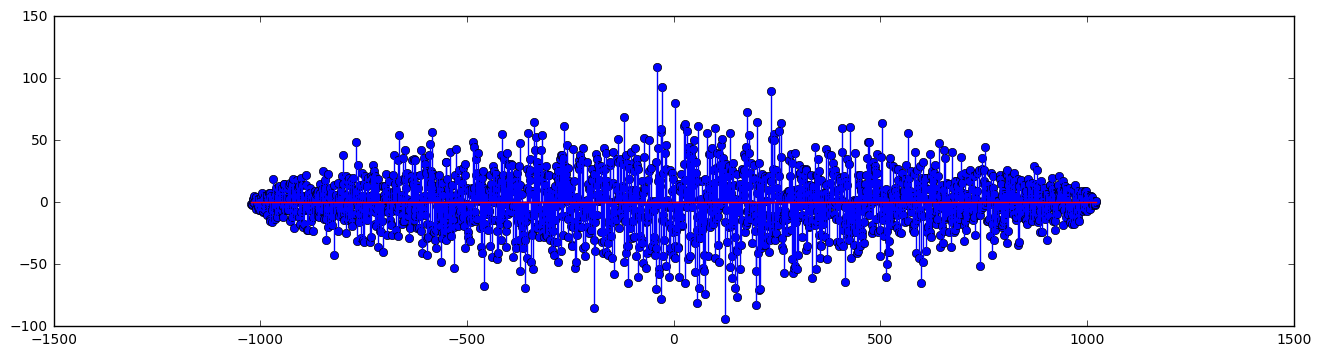

In [7]:
## THIS IS A HELPER FUNCTION FOR PART C
def integernoise_generator(length_of_noise):
    noise_array = np.random.randint(2, size = length_of_noise)
    noise_array = 2 * noise_array - np.ones(size(noise_array))
    return noise_array

# YOUR CODE HERE
intrand_signal = integernoise_generator(1023)
(ind_intrand, cross_intrand) = array_correlation(array_10, intrand_signal)
plt.figure(figsize=(16, 4))
plt.stem(ind_intrand, cross_intrand)

We see that the cross-correlation of the Gold code of any satellite with integer noise is very low.  This indicates that we can still figure out the presence of a satellite even if it is buried in noise.

### Part (d)

<Container object of 3 artists>

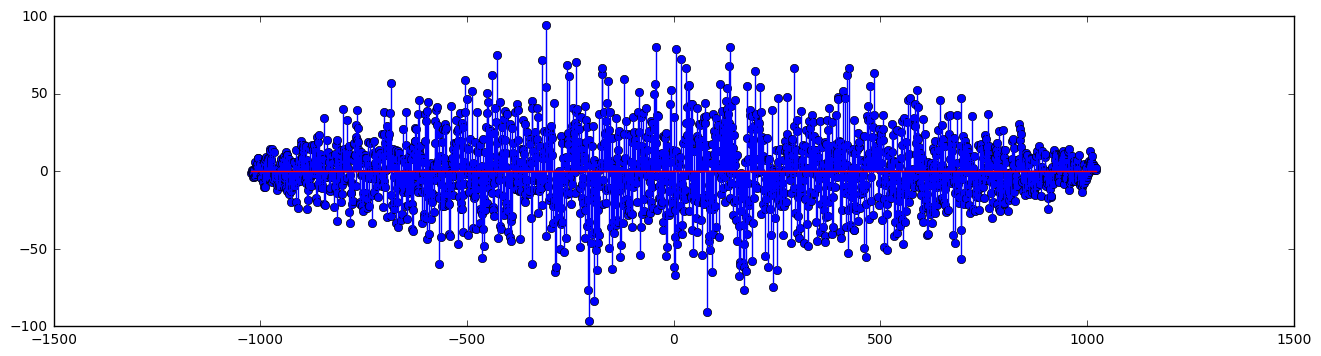

In [8]:
## THIS IS A HELPER FUNCTION FOR PART D
def gaussiannoise_generator(length_of_noise):
    noise_array = np.random.normal(0, 1, length_of_noise)
    return noise_array

# YOUR CODE HERE
gaussrand_signal = gaussiannoise_generator(1023)
(ind_gaussrand, cross_gaussrand) = array_correlation(array_10, gaussrand_signal)
plt.figure(figsize=(16, 4))
plt.stem(ind_gaussrand, cross_gaussrand)

We see that the Gold code of any satellite with Gaussian noise is very low.  This indicates that we can still figure out the presence of a satellite even if it is buried in Gaussian noise.

### Part (e)
Hint: you can use a absolute value threshold of 800 for the cross-correlation to detect if a given satellite is present. np.argwhere may be useful for detecting peak locations.

In [9]:
## USE 'np.load' FUNCTION TO LOAD THE DATA
## USE DATA1.NPY AS THE SIGNAL ARRAY

# YOUR CODE HERE
## This function returns 1 if peak (greater than threshold or less than -threshold) is found, else it returns 0.
def find_peak(signal, threshold):
    max_value = np.amax(signal)
    min_value = np.amin(signal)
    if max_value > threshold:
        ret_value = 1
    elif min_value < -1 * threshold:
        ret_value = 1
    else:
        ret_value = 0
    return ret_value
    
signal1 = np.load('data1.npy')
visible_sat_e = np.zeros(24)
thresh = 800
for sat_ID in np.arange(1,24):
    gold_code = Gold_code_satellite(sat_ID)
    (indices,correlation) = array_correlation(gold_code, signal1)
    visible_sat_e[sat_ID - 1] = find_peak(correlation, thresh)

print(visible_sat_e)
print(np.argwhere(visible_sat_e)[:,0]+1)

[ 0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
  1.  0.  0.  0.  0.  0.]
[ 4  7 13 19]


The satellites that are present are satellites 4, 7, 13, and 19.

#### Alternate approach

Plot all the correlation figures to visually figure out which satellites are present.

In [10]:
# plt.figure(figsize=(16, 40))
# for i in np.arange(1, 24):
#     plt.subplot(12, 2, i)
#     (indic, correl) = array_correlation(Gold_code_satellite(i), signal1)
#     plt.stem(indic, correl)
#     plt.title('Cross-correlation with satellite %d'%(i))

### Part (f)

In [11]:
## USE DATA2.NPY AS THE SIGNAL ARRAY

# YOUR CODE HERE
signal2 = np.load('data2.npy')
visible_sat_f = np.zeros(24)
thresh = 800
for sat_ID in np.arange(1, 24):
    gold_code = Gold_code_satellite(sat_ID)
    (indices, correlation) = array_correlation(gold_code, signal2)
    visible_sat_f[sat_ID - 1] = find_peak(correlation, thresh)

print('Satellite: #', np.argwhere(visible_sat_f)[0][0]+1)
sat_num = np.argwhere(visible_sat_f)[0][0]+1

Satellite: # 3


[[1022]
 [5114]]
[[2045]
 [3068]
 [4091]]


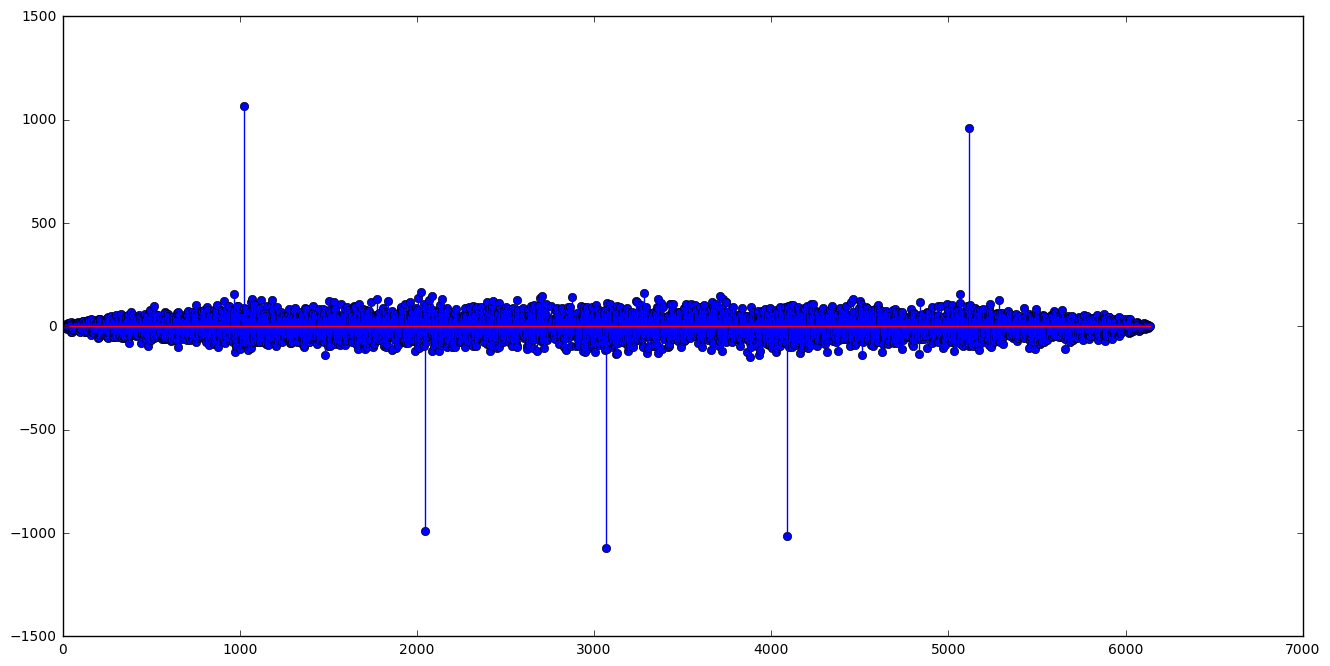

In [12]:
## Satellite visible is satellite 3. Let's now proceed to find the data.
array_3 = Gold_code_satellite(sat_num)
(ind_3, sat3_data) = array_correlation(array_3, signal2)
plt.figure(figsize=(16, 8))
plt.stem(sat3_data)
## This tells us visually that the data is 1, -1, -1, -1, 1.

## Another way to do this (which will come handy in the next part) is as follows:

## Find all 1s:
print(np.argwhere(sat3_data > thresh))

## Find all -1s:
print(np.argwhere(sat3_data < -1 * thresh))

## This again tells us that the data is 1, -1, -1, -1, 1.

Satellite 3 is transmitting 1, -1, -1, -1, 1.

### Part (g)

In [13]:
## USE DATA3.NPY AS THE SIGNAL ARRAY

# YOUR CODE HERE
signal3 = np.load('data3.npy')
visible_sat_g = np.zeros(24)
thresh = 800
for sat_ID in np.arange(1, 24):
    gold_code = Gold_code_satellite(sat_ID)
    (indices, correlation) = array_correlation(gold_code, signal3)
    visible_sat_g[sat_ID - 1] = find_peak(correlation, thresh)

print(visible_sat_g)
## This tells us that the satellites present in this data are 5 and 20. 

[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  0.  0.  0.  0.]


<Container object of 3 artists>

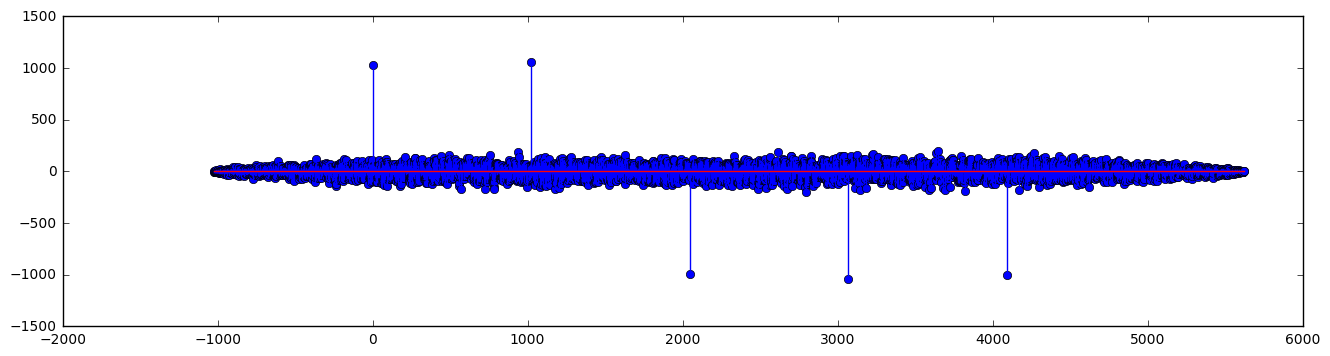

In [14]:
## We know that the data is 1, 1, -1, -1, -1, so we just find the positions of 1s in both the satellite correlations.
"""
**Note**: if you switch the order of signal3 and array_5 in array_correlation, 
you will be sliding the code the 'wrong' way across the signal, i.e., you will be 
starting at the back end of the signal and moving towards the front with the code.
You would get the reverse: -1, -1, -1, 1, 1. 
Your analysis of the delay, however, will still be the same.
"""
array_5 = Gold_code_satellite(5)
(ind_5, sat5_data) = array_correlation(signal3, array_5)

plt.figure(figsize=(16, 4))
plt.stem(ind_5, sat5_data)

<Container object of 3 artists>

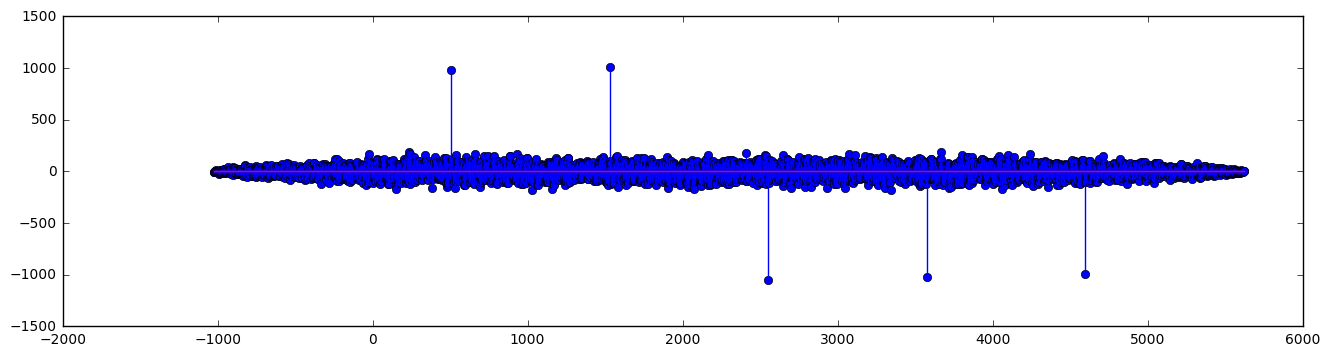

In [15]:
"""
**Note**: if you switch the order of signal3 and array_20 in array_correlation, 
you will be sliding the code the 'wrong' way across the signal, i.e., you will be 
starting at the back end of the signal and moving towards the front with the code.
You would get the reverse: -1, -1, -1, 1, 1. 
Your analysis of the delay, however, will still be the same.
"""
array_20 = Gold_code_satellite(20)
(ind_20, sat20_data) = array_correlation(signal3, array_20)

plt.figure(figsize=(16, 4))
plt.stem(ind_20, sat20_data)

In [16]:
## Find all 1s:
sat5_ones = np.argwhere(sat5_data > thresh)
sat20_ones = np.argwhere(sat20_data > thresh)
Delay = abs(sat20_ones[0] - sat5_ones[0])
## This gives us that the relative delay is 506 samples.
print('The relative delay is', Delay[0], "samples.")

The relative delay is 506 samples.
